# 统计分析-回归分析与分类分析

# 0. 概述与大纲

## 0.1 从建模的目的看回归

回归分析与分类分析都是一种基于统计模型的统计分析方法。它们都研究因变量（被解释变量）与自变量（解释变量）之间存在的潜在关系，并通过统计模型的形式将这些潜在关系进行显式的表达。不同的是，回归分析中因变量是连续变量，如工资、销售额；而分类分析中因变量是属性变量，如判断邮件“是or否”为垃圾邮件。

上一段我们提到，回归是一种基于统计模型的分析方法，因此回归分析的过程本质上一种建模过程。统计建模的主要任务有二：预测与推断。

所谓预测，就是利用一个训练完毕的模型$\hat{f}$，根据输入的自变量$X$获得对应的输出$Y$。在预测任务中，如果模型$\hat{f}$可以准确地提供预测，那么$\hat{f}$是什么形式并不重要，而如果$\hat{f}$的形式非常复杂且难以解释，我们可以将之称为黑盒模型(Black Box)。举一个例子，假设$X_1,X_2,\cdots ,X_p$是某个病人的血样特征，$Y$测量了病人使用药物后出现严重不良反应的风险，那么如果存在一个模型可以很好地通过$X$以预测$Y$，那自然是再好不过的事了。此时，模型的形式、变量之间的关系在正确预测面前都显得不那么重要。事实上，当前具有强大预测性能的模型大多都是黑盒模型，如强大的Xgboost机器学习算法以及各种深度学习算法，它们的模型可解释性差，我们难以解释其中一些参数的含义与统计性质。

与预测相对应的另一任务便是推断。在很多情况下，我们对当$X_1,X_2,\cdots ,X_p$变化时**如何影响**$Y$更感兴趣，此时，我们估计模型$\hat{f}$的目的不是为了预测$Y$，而是想明白两者之间的关系，更深层次地讲，我们想要知道模型内各种参数的数值与统计推断性质等等。在这种情况下，模型的可解释性就非常重要了，而通常我们在推断任务中最常使用的模型正是线性回归模型。举一个例子，在研究各因素对商品销售量的场景中，我们会更关注以下问题：哪类媒体对销量有直接的贡献？增加电视广告费用能对销售量带来多少程度的增加？等等，这就是典型的推断问题。

弄清楚了预测与推断的区别，我们重新审视一下回归分析：回归分析更加注重对因变量与自变量之间潜在关系的推断，所使用的统计模型也相对简单（一般为线性模型），如果你在比赛中需要分析各变量间的潜在相关关系，便可以考虑使用回归分析。





## 0.2 课程大纲

在本轮课程，我们将先后学习回归分析与分类分析的知识。其中，回归分析中我们主要学习经典线性模型(CLM, Classical Linear Model)与最小二乘估计(OLS)，广义线性模型(GLM)只做简单介绍；分类分析中我们主要学习基于线性模型的Logistics模型与Probit模型。具体大纲如下：

· 回归的思想与线性回归模型介绍

· OLS估计在经典线性回归模型假设下的统计推断

· 线性回归模型中的参数检验

· 线性回归模型设定的误差分析

· 异方差下回归建模的解决方法

首先，我们将了解回归的基本思想，并对最常用的回归模型-经典线性模型的模型形式、模型假设（也称为CLM假设）做基本的介绍。

知晓了模型的形式后，下一步自然是进行模型参数的估计，并推断估计参数的统计性质。在线性模型中，这些参数就是每个自变量的系数，我们想知道：使用何种方法进行参数估计呢？参数在这种估计方法下能否接近真实参数呢？估计的误差有多大呢？我们将学习使用最小二乘法(OLS)对线性模型进行估计，并探究OLS估计下各参数的统计性质。可以告诉大家，在满足CLM假设的前提下，OLS估计是经典线性模型最优的参数估计法；基于CLM假设与OLS估计，我们便可以对模型进行各种假设检验，包括参数显著性检验，模型显著性检验等等。

然而，理想很丰满，现实很骨感，我们所获得的实验数据不总是能满足CLM假设中的每一条假设。某个假设不成立会给模型参数估计的准确性（无偏性）、稳定性（方差）以及假设检验带来多少影响呢？这就是模型设定误差分析需要研究的内容。最后，若数据不满足CLM假设中的某个假设，需要找到对应的解决办法，在本轮课程，我们重点探讨不满足同方差假设下参数估计方法与参数检验方法的改进。

# 1. 回归模型总述

在这一章节，我们将对“回归”进行宏观的介绍，使大家对回归有直观的理解。

## 1.1 回归思想与一般回归模型

### 1.1.1 横截面数据

横截面数据是回归分析最主要的分析数据类型，它可以视为在**同一时间点（或抽样时间差异可以被忽略）**上对**多个抽样个体**的观测数据。通常，我们记第$i$个个体的观测数据为$(x_i,y_i)$。如果以抽样时间点与抽样个体数目为维度划分数据类型，除了横截面数据外，还有时间序列数据以及面板数据。时间序列数据为单个个体在不同时间点上的观测数据，而面板数据则是多个个体在不同时间点上的观测数据。对时间序列数据的分析需要用到时间序列分析的知识，对面板数据的分析则是高级计量经济学的内容，在本次课程我们不对它们做介绍。三者的区别如下图所示：

In [1]:
%%html
<img src='横截面数据.png'>

### 1.1.2 回归思想——条件均值建模

横截面数据最重要的一个特征，就是我们可以将采集的数据$(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$近似视为来自一个潜在总体的随机样本，即假设
$$
\left(x_{1}, y_{1}\right), \cdots,\left(x_{n}, y_{n}\right) \sim^{i i d}(x, y)
$$
我们进行数据分析的最终目的是为了找到$x$与$y$之间的关系并用模型显性表示出来，此时最理想的状态是使用一个**条件分布**刻画$x$对$y$的影响
$$
F_{y \mid x}
$$
即在任意给定$x$的条件下都有一个明确的分布$F$刻画$y$的状态。但是在实际问题中，直接估计这个条件分布几乎是一件不可能的事，且我们也难以对分布进行解释与应用。于是，我们退而求其次通过分布的一般数字特征对两者的关系进行推断，如条件分布的中心位置，形状，即考虑**条件均值、条件方差**
$$
E(y \mid x), \operatorname{Var}(y \mid x)
$$
而回归正是利用条件均值$E(y \mid x)$来刻画$x$与$y$的关系，回归建模的本质也正是“条件均值的建模”。那么，怎么理解条件均值建模呢？我们举一个不典型的例子帮助大家理解。

假设某个样本量为100的数据集中，自变量$x$有1,2,3,4,5五个值，样本的因变量$y$都来自以其自变量为均值，方差为1的正态分布。我们想要刻画因变量与自变量之间的变化关系，就要找出可以代表各种类样本内（在此例中以自变量为划分依据）共性的特征，用这些特征来描绘变化关系。最直观也是最简单的特征就是条件均值，即给定$x$的条件下样本的均值。


In [2]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Text(0.5, 1.0, 'E(Y|X)')

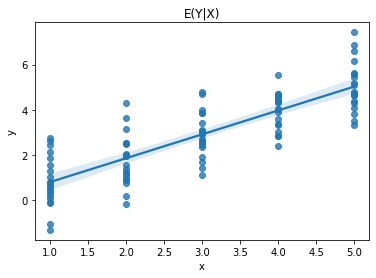

In [3]:
x=list()
y=list()
for i in [1,2,3,4,5]:
    y_norm=stats.norm.rvs(i,1,20,random_state=i).tolist()
    y.extend(y_norm)
    x1=np.ones(20)*i
    x1=x1.tolist()
    x.extend(x1)

data={'x':x,'y':y}
df=pd.DataFrame(data)

sns.regplot(x='x',y='y',data=df)
plt.title('E(Y|X)')

根据上图我们可以看出，$E(y|x=1)=1$,$E(y|x=2)=2$,…,$E(y|x=x_0)=x_0$。通过条件均值，我们可以推断出$x$与$y$的关系可以用模型$y=x+u$来刻画，其中，$u$被称为随机误差，可理解为：除$x$外，其他影响$y$取值的因素。

### 1.1.3 一般回归模型

在上述例子中，我们使用模型$y=x+u$刻画了$x$与$y$的关系，这说明了在这个数据集中我们将模型设定为了
$$
y=x+u
$$
事实上，如果我们将上述公式中的$x$泛化成条件均值$E(y|x)$，那么我们就能得到最一般的回归模型
$$
y=E(y|x)+u
$$
这也就意味着，所谓回归模型的建模，**本质上就是条件均值建模**

**· 回归模型的条件解读**

一般回归模型$y=E(y|x)+u$暗含了一个天然成立的假设：
1. 随机误差的条件期望$E(u|x)=0$

利用重期望公式，我们可以根据假设1进一步推得下面两个推论:

推论1. 随机误差的无条件期望$E(u)=0$——这表示其他因素对$y$的平均影响为0
<br>
推论2. 随机误差$u$与自变量$x$协方差$Cov(u,x)=0$——这表示其他因素与参与回归的$x$不相关！

根据假设1，我们可以将一般回归模型表示成一种新的形式：
$$
y=E(y|x)+u\Longleftrightarrow y=m\left( x \right) +u, where\,\,E\left( u|x \right) =0
$$
在这里，$E(u|x)=0$等价于$m(x)=E(y|x)$。事实上，用这一种形式表示回归模型更常见，也更有利于接下来对模型$m(x)$具体形式的假定，因为这告诉了我们：只要假定随机误差$u$与$x$不相关（这里可理解为其他影响$y$的外生因素与内生因素$x$不相关），我们就可以根据需要假定回归模型的具体形式。

## 1.2 线性回归模型

### 1.2.1 线性模型形式

上面的学习中我们介绍了回归模型的一般形式。在实际建模中，为了有效的估计，我们必须对模型中$m(x)$的形式进行具体的假定。在所有模型假定形式中，线性回归模型是最常用假定形式，也是回归分析中最重要的模型，是本次课程重点讲解的内容。

线性模型假设有：
$$
m(x)=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}
$$
于是，线性回归模型可表示为：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}+u, \quad E\left(u \mid x_{1}, \cdots, x_{p}\right)=0
$$
回归分析主要研究如何有效地估计模型中的参数$\hat{\beta}_i$，并利用模型进行推断与预测。

### 1.2.2 从简单线性回归到多元线性回归

**· 用简单线性回归理解对模型的解释**

为大家快速理解线性回归模型，我们先假设$x$是一维的，即只考虑一个因素对$y$的影响，此时亦称模型为简单线性回归，形式为
$$
y=\beta_{0}+\beta_{1} x+u, \quad E(u \mid x)=0
$$
$\beta_{0}$是截距项，可以理解为$x=0$时$y$的期望值，一般情况下，如果我们回归的任务是推断，则截距通常不重要；
<br>
$\beta_{1}=\frac{\Delta m(x)}{\Delta x}$，可理解为$x$每增加一个单位，$y$**平均**增加$\beta_1$个单位。

此后，我们将默认模型含有$E(u|x)=0$的设定（因为只有这样模型才代表回归模型），该条件不再以书面形式写出。

我们举一个例子帮助大家理解：

**Example1.** 假设大学成绩colGPA与高中成绩hsGPA间关系为
$$
\text { colGPA }=\beta_{0}+\beta_{1} \text { hsGPA }+u
$$
$\beta_1$系数的解释为：每增加1单位高中成绩，大学成绩会增加$\beta_1$个单位；由于该模型中自变量只有高中成绩，而大学成绩水平肯定还受其他因素影响，因此该模型中的随机误差包含了如大学测验水平、自主学习能力等因素。

注意：设定$E(u|x)=0$的存在暗含了**在该模型中**大学测验水平、自主学习能力等因素与自变量高中成绩无关，但这在**实际问题中**未必成立。而一旦它们存在相关性，就意味着模型假设不符合实际情况，模型估计的有效性与准确性也将受到影响。

**· 进行全面的回归建模——多元线性回归**

单纯的简单线性模型有很大的局限性，原因有二：

1、在实际问题中，因变量$y$通常受多个因素影响，这些因素之间可能彼此之间存在线性相关性（后续的学习中我们将这种现象称为多重共线性），而默认假设$E(u|x)=0$的直接推论(推论2)就是其他影响因素与$x$线性无关，显然不一定符合实际情况。

2、如果我们想推断一个变量对另一个变量的因果关系，就要保持尽可能多的其他因素的不变，因此需要尽量把关键因素纳入到回归模型当中，这样便可以控制多个变量，查看某个特定变量变化对自变量的影响。

因此在实际问题中，我们更多地使用多元线性回归。一般的多元线性回归模型可写成：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
$u$依旧为随机误差项，它表示除$x_1$,…,$x_k$以外的其他因素对因变量$y$的影响，且同样满足假设
$$
E\left(u \mid x_{1}, \cdots, x_{k}\right)=0
$$
$\beta_i=\frac{\partial m\left( x \right)}{\partial x_i}$是回归函数对变量$x_i$的偏导数，它被解释为**在保持其他自变量不变的情况下，$x_i$每增加一单位，$y$平均增加$\beta_i$个单位**

In [5]:
data=pd.read_stata('gpa1.dta')

In [6]:
data

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
1,21.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.4,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,19.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.6,...,0.0,1.0,1.0,1.0,0.0,0.0,1.5,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,22.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
137,21.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.3,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
138,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.8,...,0.0,1.0,1.0,1.0,0.0,0.0,0.3,1.0,0.0,0.0
139,20.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.4,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,0.0,1.0
